In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/abhishekgd96/Clustering/main/EastWestAirlines.csv')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
data = data.rename(columns = {'ID#':'ID','Award?':'Award'}) 
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
df_norm = norm_func(data.iloc[:,1:])

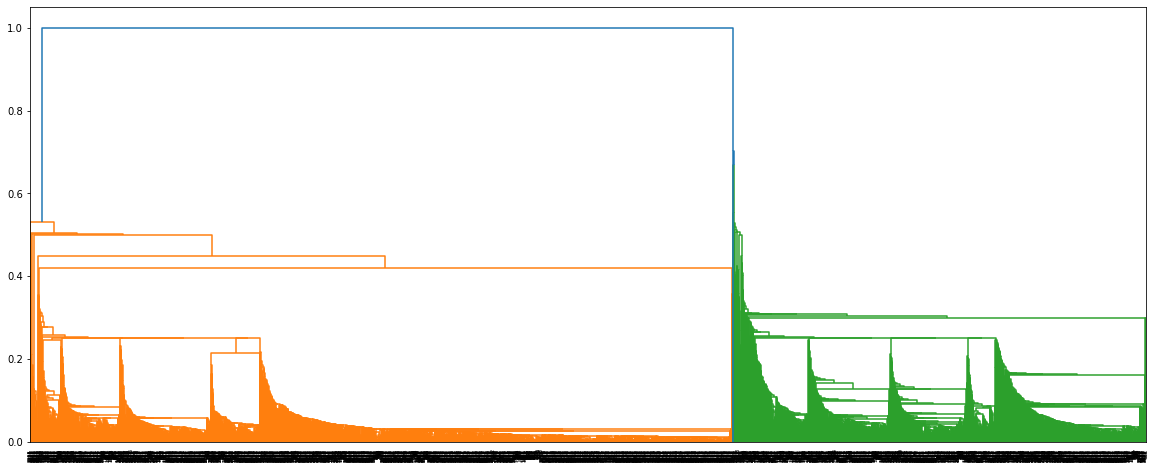

In [7]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

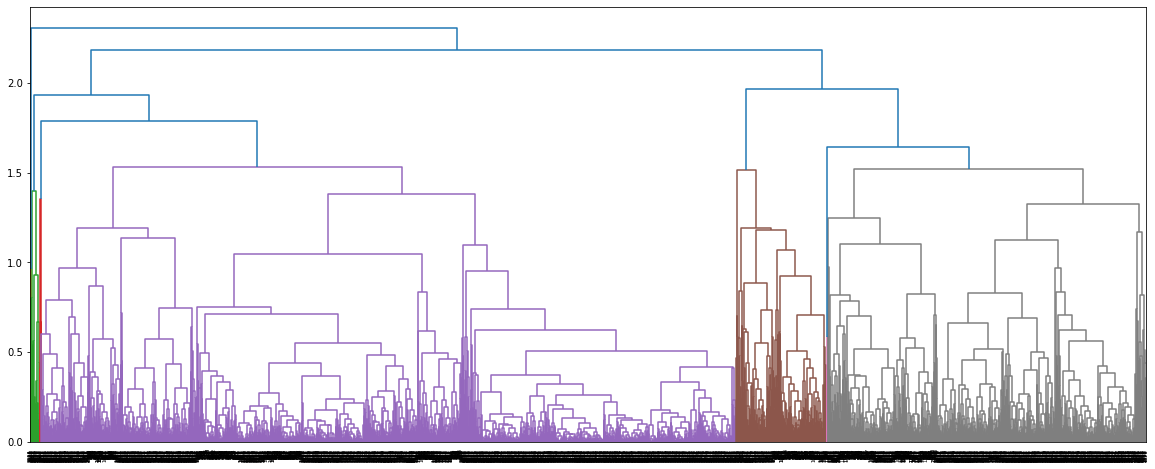

In [8]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

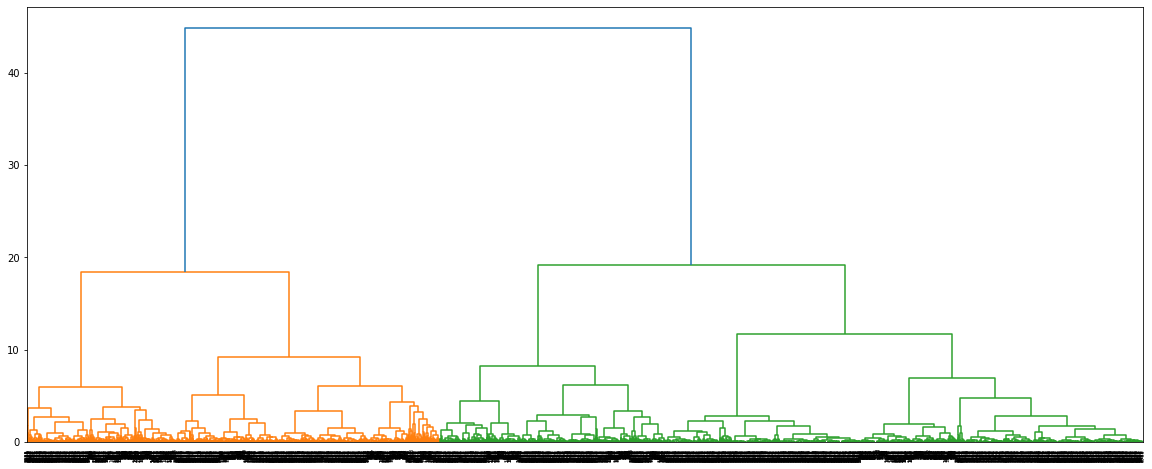

In [9]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

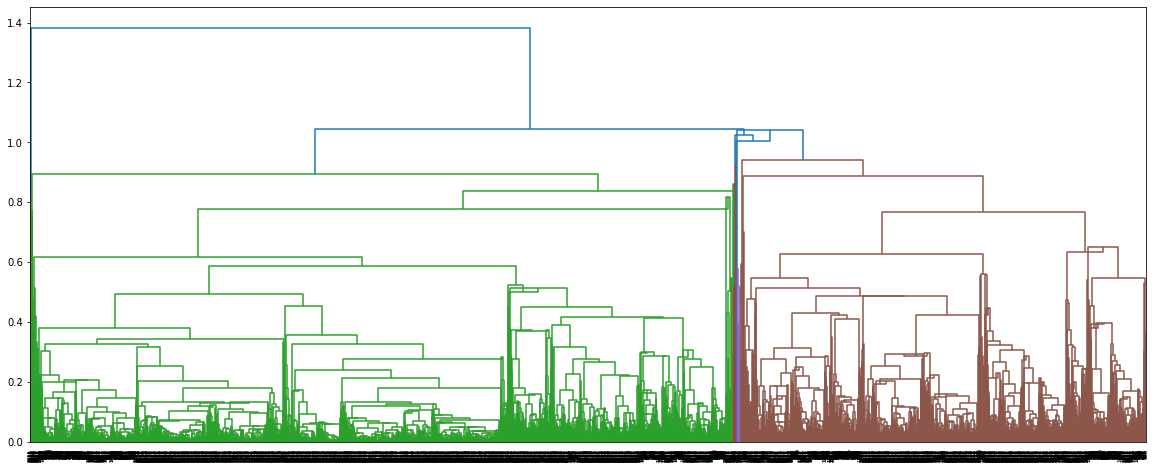

In [10]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='median'))

In [11]:
# create clusters
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'ward')

In [12]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [13]:
Clusters.value_counts()

Clusters
1           1011
0            808
4            699
2            582
3            535
5            364
dtype: int64

In [14]:
df_norm['clusterid'] = Clusters

In [15]:
df_norm.sort_values('clusterid')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
1248,0.047683,0.000000,0.25,0.0,0.0,0.039904,0.162791,0.046403,0.018868,0.621172,0.0,0
773,0.018979,0.000000,0.50,0.0,0.0,0.086914,0.220930,0.000000,0.000000,0.792018,0.0,0
1823,0.015229,0.000000,0.25,0.0,0.0,0.031033,0.290698,0.000000,0.000000,0.511454,0.0,0
1819,0.017986,0.000000,0.50,0.0,0.0,0.080558,0.255814,0.022715,0.094340,0.514348,0.0,0
1817,0.044058,0.000000,0.75,0.0,0.0,0.134752,0.162791,0.016225,0.018868,0.514709,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1316,0.043862,0.000000,0.25,0.0,0.0,0.078237,0.093023,0.000000,0.000000,0.648903,1.0,5
2992,0.035388,0.000000,0.50,0.0,0.0,0.067801,0.313953,0.000000,0.000000,0.365807,1.0,5
2993,0.028135,0.264352,0.50,0.0,0.0,0.195745,0.127907,0.021092,0.056604,0.378949,1.0,5
2964,0.029181,0.000000,0.50,0.0,0.0,0.051611,0.209302,0.000000,0.000000,0.393417,1.0,5


#K-Means

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [17]:
data = pd.read_csv('https://raw.githubusercontent.com/abhishekgd96/Clustering/main/EastWestAirlines.csv')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [18]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data.iloc[:,1:])

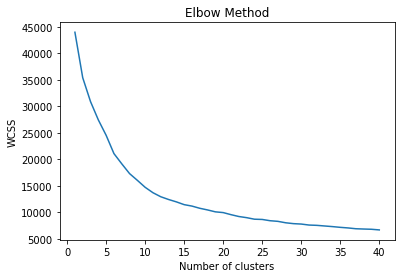

In [19]:
wcss = []
for i in range(1, 41):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 41), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
clusters_new = KMeans(23, random_state=42)
clusters_new.fit(scaled_df)

KMeans(n_clusters=23, random_state=42)

In [21]:
clusters_new.labels_

array([20, 20, 20, ...,  3, 17, 17], dtype=int32)

In [22]:
data['clusterid_new'] = clusters_new.labels_

In [23]:
clusters_new.cluster_centers_

array([[-3.95084676e-02, -3.08243311e-02, -7.23460959e-01,
        -9.82418871e-02, -6.27665798e-02, -4.83902112e-01,
        -1.75084237e-01,  2.11893352e+00,  1.63833450e+00,
        -5.94341617e-01, -6.68307991e-01],
       [-3.89426720e-01, -1.67103636e-01, -7.48706285e-01,
        -9.82418871e-02, -6.27665798e-02, -6.20676769e-01,
        -8.11200325e-01, -2.59382174e-01, -2.67208228e-01,
         2.20454221e-02, -7.66919299e-01],
       [ 4.43875214e-01, -7.00090524e-02,  2.06143552e+00,
        -9.82418871e-02, -3.19080167e-02,  2.49210093e+00,
         1.00254157e+00, -8.73397700e-02, -5.72064756e-02,
         6.42595567e-01,  1.27896831e+00],
       [-1.90170421e-01, -1.47349299e-01,  9.53207910e-01,
        -9.82418871e-02, -6.27665798e-02,  4.58258339e-01,
         6.24557055e-01, -2.02770840e-01, -2.14629951e-01,
        -5.44062710e-01,  1.30391816e+00],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
  

In [24]:
data.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2726.142857,69620.333333,120.269841,1.063492,1.0,1.000000,5459.603175,9.920635,3426.634921,7.587302,2891.317460,0.047619
1,1,1993.879310,34361.498084,14.848659,1.028736,1.0,1.000000,2156.775862,3.812261,96.911877,0.360153,4164.080460,0.000000
2,2,1276.831325,118327.554217,89.957831,4.897590,1.0,1.006024,77323.969880,21.228916,337.777108,1.156627,5445.439759,0.987952
3,3,2676.418773,54439.173285,30.129964,3.371841,1.0,1.000000,28210.844765,17.599278,176.169675,0.559567,2995.137184,1.000000
4,4,1664.866667,138061.400000,78.800000,3.466667,1.0,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,5,1730.333333,118980.333333,7192.740741,1.851852,1.0,1.000000,15077.888889,11.740741,1184.851852,3.481481,4630.888889,0.592593
6,6,2212.000000,52231.400000,66.666667,1.000000,3.0,1.000000,20410.466667,18.933333,692.666667,3.200000,4075.533333,0.400000
7,7,933.672414,457332.672414,13.500000,3.396552,1.0,1.000000,43072.931034,16.465517,530.327586,1.862069,6042.189655,0.655172
8,8,1222.688889,200102.755556,311.022222,4.577778,1.0,1.000000,89384.400000,34.844444,3729.400000,10.400000,5653.511111,0.888889


In [25]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,20
1,2,19244,0,1,1,1,215,2,0,0,6968,0,20
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,20
3,4,14776,0,1,1,1,500,1,0,0,6952,0,20
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,9
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,9
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,17


#DB-Scan

In [26]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [27]:
data = pd.read_csv("https://raw.githubusercontent.com/abhishekgd96/Clustering/main/EastWestAirlines.csv")
data = data.rename(columns = {'ID#':'ID','Award?':'Award'}) 

In [28]:
data = data.iloc[:,1:]
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


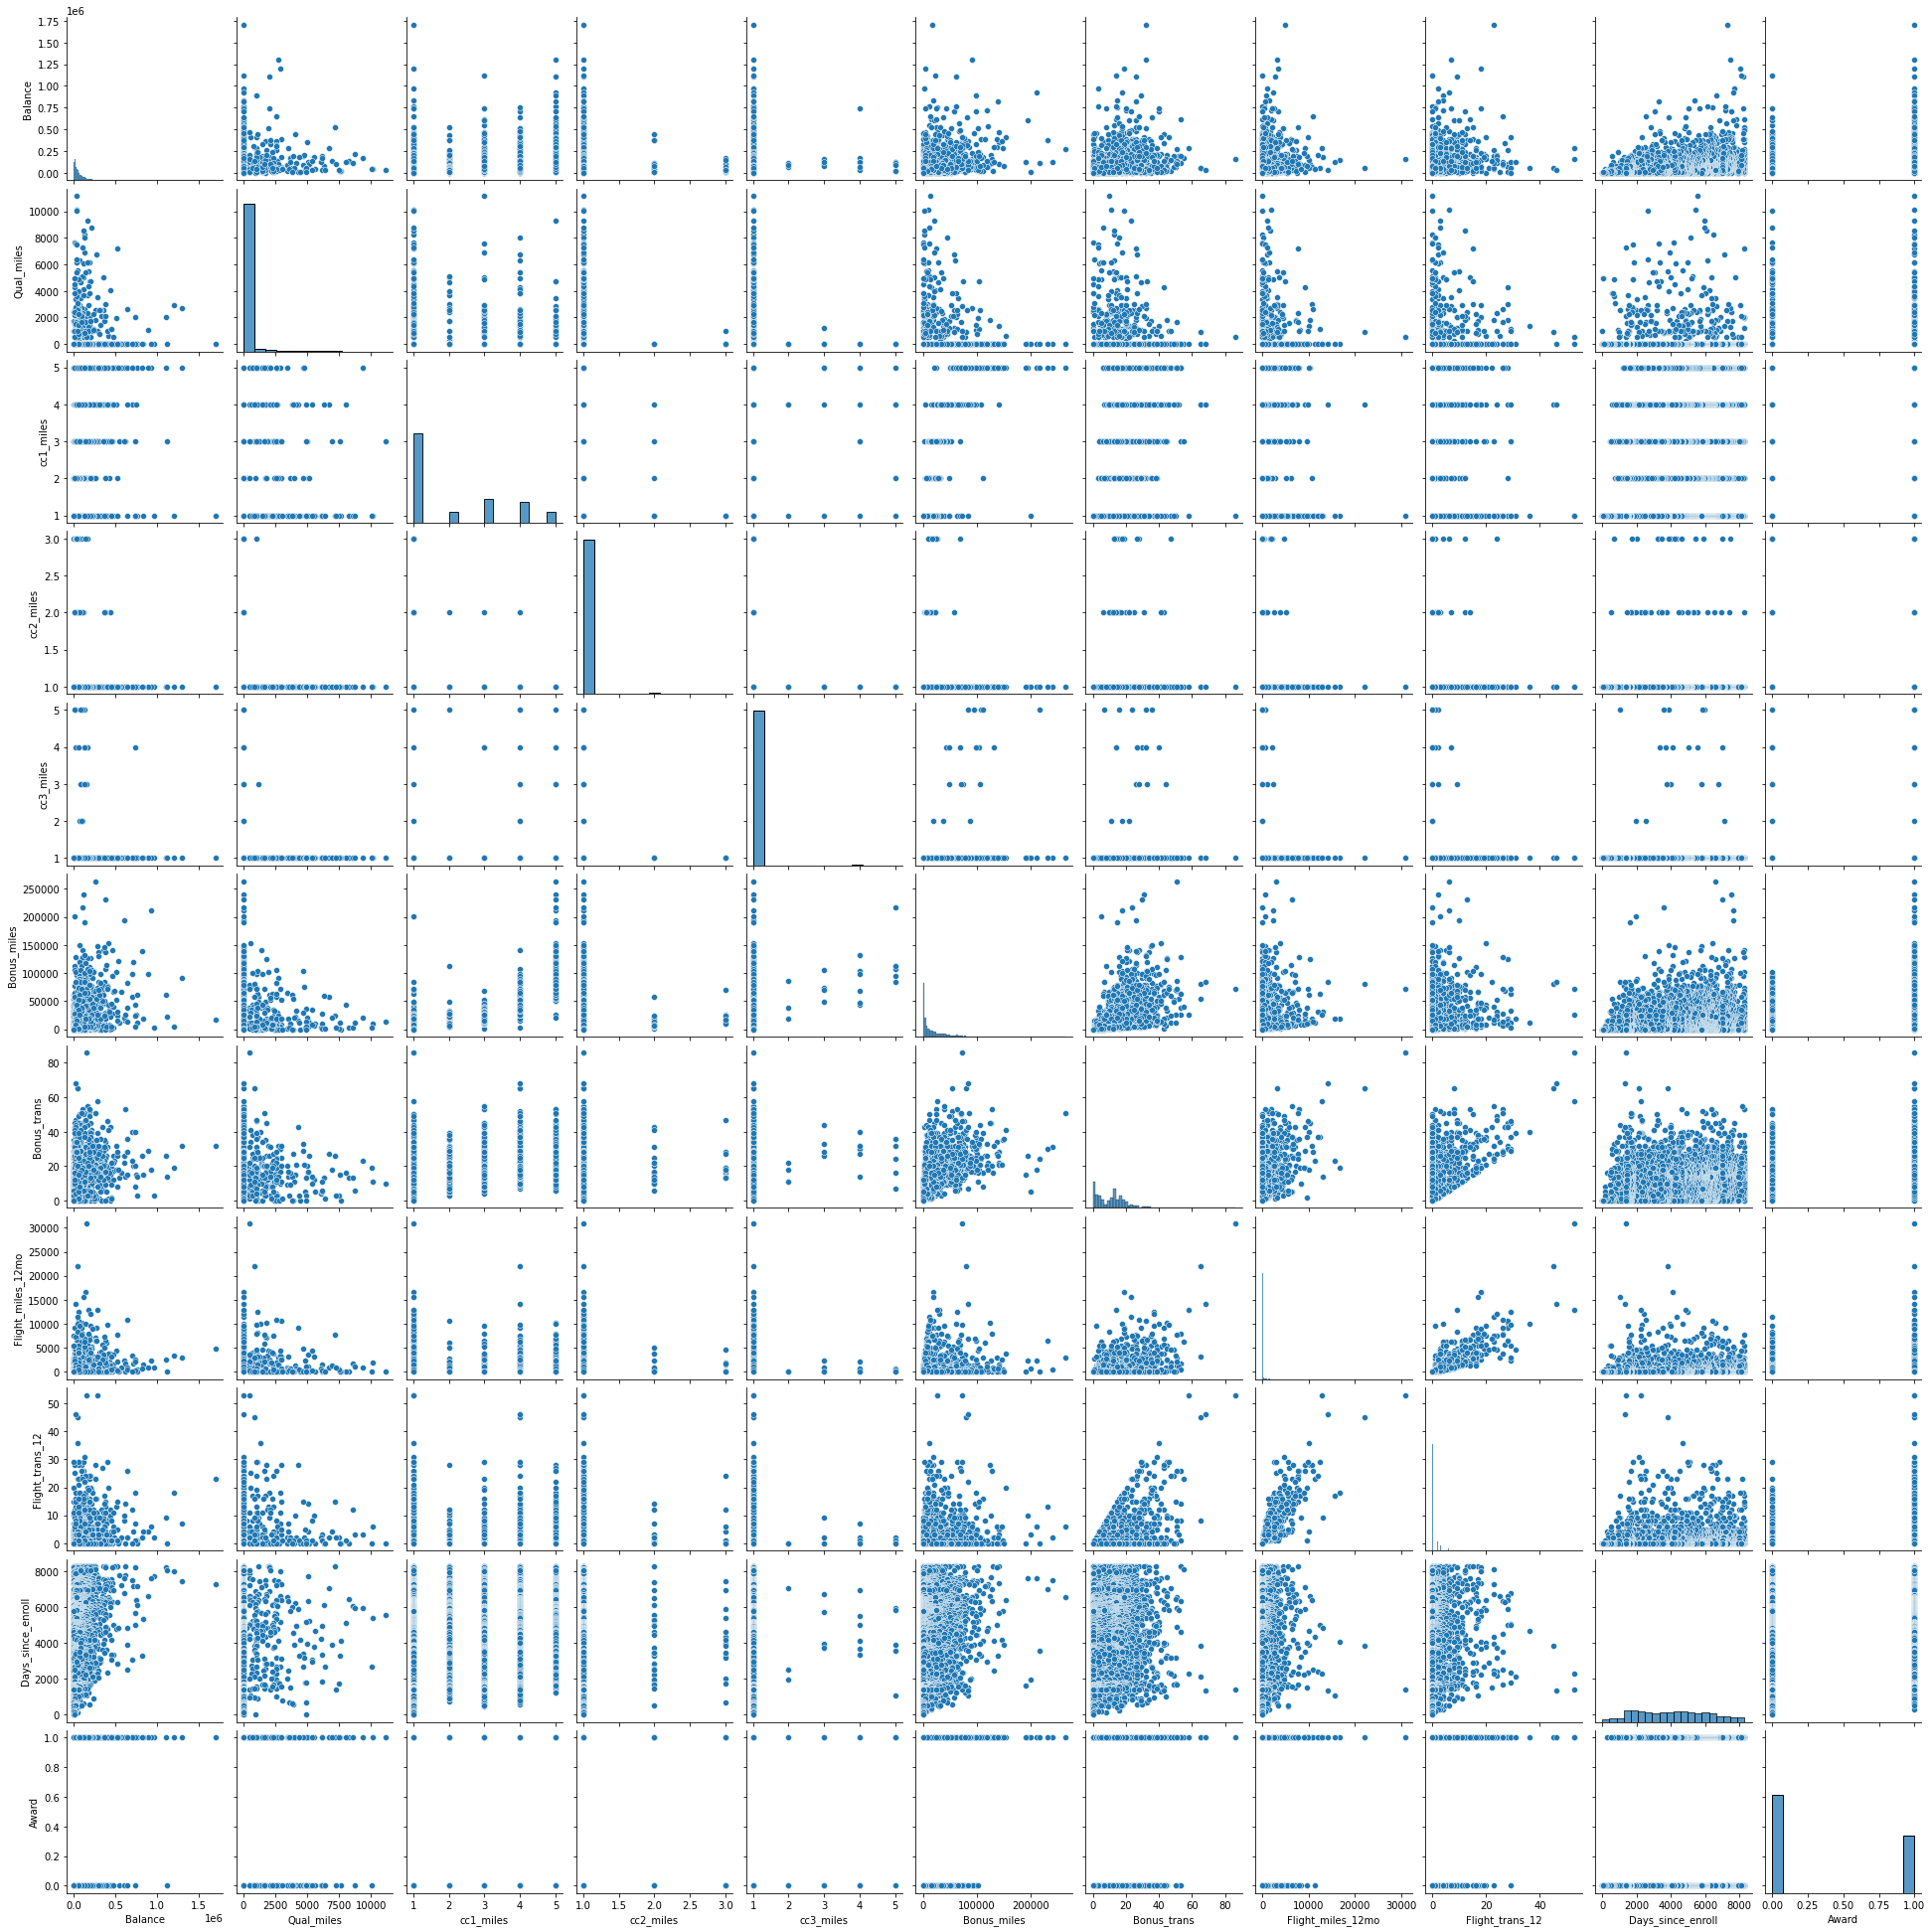

In [29]:
sns.pairplot(data)

In [30]:
stscaler = StandardScaler().fit(data)
X = stscaler.transform(data)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

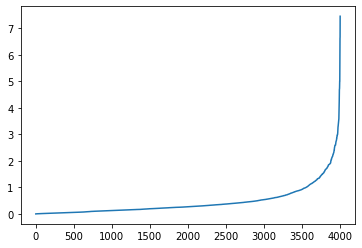

In [31]:
# for K distance graph
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [32]:
dbscan = DBSCAN(eps=0.7, min_samples=10)
dbscan.fit(X)

DBSCAN(eps=0.7, min_samples=10)

In [33]:
dbscan.labels_

array([0, 0, 0, ..., 4, 0, 0])

In [34]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [35]:
cl.value_counts()

cluster
 0         1515
-1         1110
 1          316
 5          268
 4          196
 3          182
 6          148
 2          144
 7           64
 8           43
 9           13
dtype: int64

In [36]:
data = pd.concat([data,cl],axis=1)

With DBScan it becomes much clear that a lot of data entries are actually noise, but in Hierarchical(Agglomerative) and K-Means they were forcefully assigned to some cluster because both algorithms provide user with the choice of selecting the number of clusters whereas DBScan does not do that directly and asks for Eps and MinPts